In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [19]:
score_df = pd.read_csv('/Users/risharane/Downloads/archive-7/score_updated.csv')

In [20]:
score_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
# Dataset is already consists cleaned and preprocessed data
score_df.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


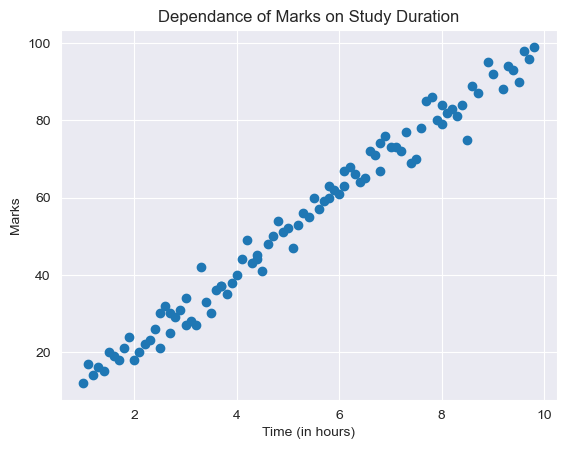

In [22]:
#Visualtizing the correlation between Hours and marks
sns.set_style('darkgrid')
plt.title('Dependance of Marks on Study Duration');
plt.scatter(x = 'Hours', y = 'Scores', data = score_df);
plt.xlabel('Time (in hours)');
plt.ylabel('Marks');

In [27]:
X = score_df.iloc[:,0:1]
y = score_df.iloc[:,1]

In [28]:
print(f'X.shape = {X.shape}\ny.shape = {y.shape}')

X.shape = (96, 1)
y.shape = (96,)


In [29]:
# Dividing dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Actual packages
y_test

80    32
77    51
73    27
94    37
33    82
79    89
69    70
42    71
0     21
10    85
64    55
30    19
18    67
4     30
31    92
26    90
12    41
22    35
53    36
85    52
Name: Scores, dtype: int64

In [37]:
# Actual Hours
X_test

,Hours
80,2.6
77,4.9
73,3.0
94,3.7
33,8.1
79,8.6
69,7.5
42,6.7
0,2.5
10,7.7


In [38]:
# Predicting Packages by inputing Hours test set
model.predict(X_test)

array([28.01321679, 50.63517747, 31.94747083, 38.83241538, 82.10920972,
       87.02702726, 76.20782868, 68.33932061, 27.02965329, 78.17495569,
       55.55299501, 18.17758172, 62.43793957, 36.86528836, 90.96128129,
       95.87909883, 46.70092344, 39.81597889, 37.84885187, 51.61874098])

study duration = X_test<br> actual score = y_test<br> Predicted score = model.predict(X_test)

study duration = 2.6 hours, actual score = 32,  predicted score = 28<br>
study duration = 4.9 hours, actual score = 51,  predicted score = 50.6<br>
study duration = 9.5 hours, actual score = 90,  predicted score = 95

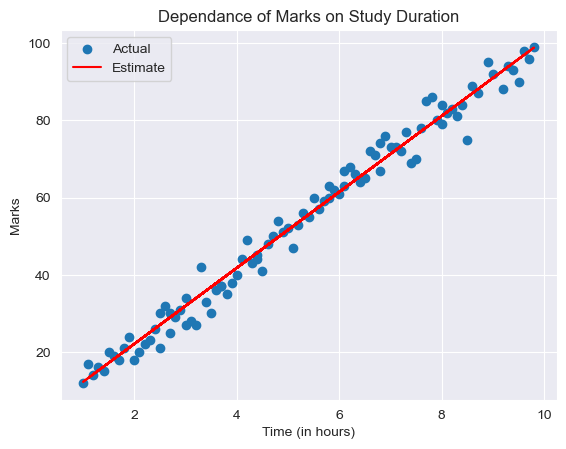

In [43]:
# Plotting the best fit line on actual data
plt.title('Dependance of Marks on Study Duration');
plt.scatter(x = 'Hours', y = 'Scores', data = score_df);
plt.plot(X_train, model.predict(X_train), c = 'r');
plt.xlabel('Time (in hours)');
plt.ylabel('Marks');
plt.legend(['Actual', 'Estimate']);

In [51]:
y_actual = y_test
y_predict = model.predict(X_test)

In [56]:
print(f'MAE[Mean Absolute Error] : {mean_absolute_error(y_actual, y_predict)} Marks')

MAE[Mean Absolute Error] : 3.3702236454952397 Marks


Our model just differs/ shows error of approx 3 marks

In [57]:
print(f'MSE[Mean Squared Error] : {mean_squared_error(y_actual, y_predict)} Marks')

MSE[Mean Squared Error] : 17.007444250866516 Marks


In [59]:
print(f'RMSE[Root Mean Absolute Error] : {np.sqrt(mean_squared_error(y_actual, y_predict))} Marks')

RMSE[Root Mean Absolute Error] : 4.124008274830024 Marks


In [60]:
print(f'R2 Score : {r2_score(y_actual, y_predict)}')

R2 Score : 0.9708871356050831


In [61]:
r2 = r2_score(y_actual, y_predict)
X_test.shape

(20, 1)

In [63]:
adjusted_r2 = 1 - (((1 - r2)*(20 - 1)) / (20 - 1 - 1))
print(f'Adjusted r2 Score : {adjusted_r2}')

Adjusted r2 Score : 0.96926975424981
